# ニューラルネットワーク入門

In [1]:
# 表データを扱うライブラリ
import pandas as pd

# 乱数を扱うライブラリ
import random

# グラフ描画ライブラリ
import seaborn as sns
import matplotlib.pyplot as plt

# グラフ描画のためのおまじない
sns.set()
sns.set_style('ticks')
%matplotlib inline

In [2]:
# データを読み込む
data_url = "https://raw.githubusercontent.com/hontolab-courses/ml-lecturenote/main/content/data/sgd-data.tsv"
df = pd.read_table(data_url, header=0, sep="\t")

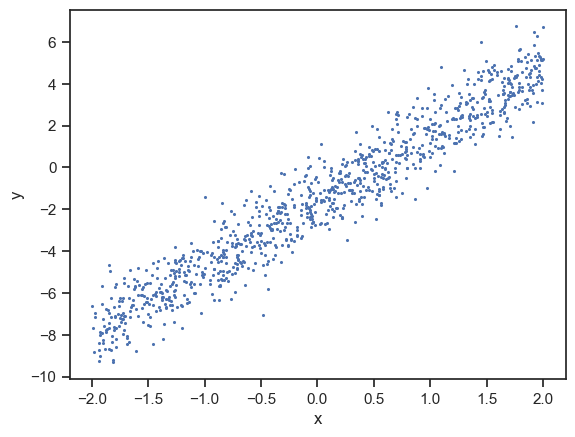

In [3]:
# 可視化
sns.scatterplot(x=df["x"], y=df["y"], linewidth=0, s=5)
plt.show()

---

## クイズ

(L8-Q1)=
### Q1: 最急降下法 for 複数パラメータ

[7章の例題2](https://mlnote.hontolab.org/content/neural-network.html#c7-s2)では直線の切片は既知（-1.59），傾きは未知として，傾き$w_1$を最急降下法によって求めた．
以下のコードは，傾き$w_1$，切片$w_0$ともに未知とした場合，$w_1$と$w_0$を最急降下法で求めるコードである．
コード中の関数`gradient_w0`および`gradient_descent_for_two_params`の未完部分を完成させなさい．

In [4]:
# 傾きw_1の勾配
def gradient_w1(x_list, y_list, w1, w0):
    grad_w1 = 0
    
    # データを1個ずつ処理
    for x, y in zip(x_list, y_list):
        grad_w1 += 2 * (-x) * (y - w1 * x  + w0)
        
    return grad_w1


# 切片w_0の勾配
def gradient_w0(x_list, y_list, w1, w0):
    grad_w0 = 0
    
    # データを1個ずつ処理
    for x, y in zip(x_list, y_list):
        # ------------------
        # 以下のコードを完成させる
        grad_w0 += 2 * (y - w1 * x  + w0)
        
        # ここまで
        # ------------------
        
    return grad_w0


# 最急降下法
def gradient_descent_for_two_params(
    x_list, y_list, alpha=0.0001, delta_threshold=1e-8, epoch_num=10000):
    """ alpha: 学習率，
        delta_treshold: パラメータの更新量の絶対値に対する閾値
        epoch_num: 更新回数の上限
    """
    
    # パラメータをランダムに初期化
    w1 = random.random()
    w0 = random.random()
    
    for epoch in range(epoch_num):
        # パラメータの更新式
        # ---------------------
        # 以下のコードを完成させる
        w1_new = w1 - alpha * gradient_w1(x_list, y_list, w1, w0)
        w0_new = w0 - alpha * gradient_w0(x_list, y_list, w1, w0)
        # ここまで
        # ---------------------

        # パラメータの更新量の絶対値
        w1_delta = abs(w1_new - w1)
        w0_delta = abs(w0_new - w0)
        if w1_delta < delta_threshold and w0_delta < delta_threshold:
            # パラメータがほぼ変化しなくなったら，更新を終了する
            return (w1_new, w0_new)
        else:
            # まだ変化する余地があるなら，引き続きパラメータを更新する
            if epoch % 10 == 0:
                print(f"更新回数 {epoch+1}回目\t", w1, w0)
            w1 = w1_new
            w0 = w0_new
            
    return (w1_new, w0_new)


# データセット
x_list = df["x"]
y_list = df["y"]

# 最急降下法の実行
w1, w0 = gradient_descent_for_two_params(x_list, y_list, 0.0001, 1e-8, 10000)

print()
print("Optimized w1 =", w1)
print("Optimized w0 =", w0)

更新回数 1回目	 0.3150094123037015 0.6154819761426054
更新回数 11回目	 3.0041296700756734 1.4674678321120977
更新回数 21回目	 3.1517927613767 1.5837078161782514
更新回数 31回目	 3.160529032830626 1.5975850863245638
更新回数 41回目	 3.1611091838934837 1.599161430021953
更新回数 51回目	 3.1611536295465648 1.5993367631668813
更新回数 61回目	 3.1611575278613278 1.5993560835196605
更新回数 71回目	 3.161157905417216 1.5993582034392664

Optimized w1 = 3.1611579430772325
Optimized w0 = 1.5993584285292195


(L8-Q2)=
### Q2: 確率的勾配降下法

[7章の例題2](https://mlnote.hontolab.org/content/neural-network.html#c7-s2)で用いたコードを修正し，確率的勾配降下法で直線の傾き$w$を求めるコードを書きなさい．
なお，このクイズでは（Q1とは異なり）切片は既知（1.59）としてよい．


In [5]:
import random

# 傾きwの勾配
def gradient_for_sgd(x, y, w):
    grad = 2 * (-x) * (y - w * x  + 1.59)
    return grad


# 確率的勾配降下法
def stochastic_gradient_descent(
    x_list, y_list, alpha=0.001, delta_threshold=1e-8, epoch_num=10000):
    """ alpha: 学習率，
        delta_treshold: パラメータの更新量の絶対値に対する閾値
        epoch_num: 更新回数の上限
    """
    # zip関数はx_list=[x_0, x_1, ..., x_n]とy_list=[y_0, y_1, ..., y_n]を受け取ると
    # 要素を束ねた新しいリスト[(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)]を返す
    data = list(zip(x_list, y_list))
    
    # パラメータをランダムに初期化
    w = random.random()

    # パラメータ更新を何回したかを記録しておくカウンタ
    update_num = 0

    for epoch in range(epoch_num):
        # データをシャッフルする
        random.shuffle(data)

        # シャッフルされたdataの先頭から1つずつ要素を取り出し勾配を更新
        for x, y in data:           
            # パラメータの更新式
            w_new = w - alpha * gradient_for_sgd(x, y, w)

            # パラメータの更新量の絶対値
            w_delta = abs(w_new - w)
            if w_delta < delta_threshold:
                # パラメータがほぼ変化しなくなったら，更新を終了する
                return w_new
            else:
                # まだ変化する余地があるなら，引き続きパラメータを更新する
                update_num += 1
                w = w_new
                if epoch % 5 == 0 and update_num % 1000 == 0:
                    print(f"Epoch {epoch+1} - パラメータ{update_num}回更新\t", w)
                
    return w_new


# データセット
x_list = df["x"]
y_list = df["y"]

# 確率的勾配降下法の実行
w = stochastic_gradient_descent(x_list, y_list, 0.001, 1e-8, 10000)

print()
print("Optimized w =", w)


Epoch 1 - パラメータ1000回更新	 2.996895752882299
Epoch 6 - パラメータ6000回更新	 3.1434240462841667
Epoch 11 - パラメータ11000回更新	 3.1391589053949285
Epoch 16 - パラメータ16000回更新	 3.1259428673868856
Epoch 21 - パラメータ21000回更新	 3.1732428587146897
Epoch 26 - パラメータ26000回更新	 3.1757451944332695
Epoch 31 - パラメータ31000回更新	 3.1531932598406165
Epoch 36 - パラメータ36000回更新	 3.1652436169828158
Epoch 41 - パラメータ41000回更新	 3.152983752146602
Epoch 46 - パラメータ46000回更新	 3.186663826431412
Epoch 51 - パラメータ51000回更新	 3.145590612776373
Epoch 56 - パラメータ56000回更新	 3.1605180007165217
Epoch 61 - パラメータ61000回更新	 3.1486698631072634
Epoch 66 - パラメータ66000回更新	 3.132396930604537
Epoch 71 - パラメータ71000回更新	 3.1774536464534897
Epoch 76 - パラメータ76000回更新	 3.1735065821416892
Epoch 81 - パラメータ81000回更新	 3.2032268987774972
Epoch 86 - パラメータ86000回更新	 3.1693398988178623
Epoch 91 - パラメータ91000回更新	 3.1517891360738672
Epoch 96 - パラメータ96000回更新	 3.171538356494115
Epoch 101 - パラメータ101000回更新	 3.1714141096856086
Epoch 106 - パラメータ106000回更新	 3.1194445771581245
Epoch 111 - パラメー